In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [4]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [5]:
import pandas as pd
from PIL import Image as ima
import warnings
from pathlib import Path
import random
import seaborn as sns

### Functions preparation

In [6]:
# Function preparation
from mt_function_yl import *

### Data preparation

In [7]:
koord  = pd.read_csv('/home/yelhe/script/mt/output/koord.csv')

In [8]:
# koord.head()
name1 = koord.Nr.astype(str) + '1.jpg'
name2 = koord.Nr.astype(str) + '2.jpg'
name3 = koord.Nr.astype(str) + '3.jpg'
name4 = koord.Nr.astype(str) + '4.jpg'

In [9]:
gsv_image1 = []
gsv_image2 = []
gsv_image3 = []
gsv_image4 = []

nf1 = []
nf2 = []
nf3 = []
nf4 = []
for i in range(0,349):
    path1 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name1[i])
    c1 = path1.is_file()
    path2 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name2[i])
    c2 = path2.is_file()
    path3 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name3[i])
    c3 = path3.is_file()
    path4 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name4[i])
    c4 = path4.is_file()
    if c1 is True:
        im1 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name1[i])
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
        gsv_image1.append(im1)
        nf1.append(name1[i])
    if c2 is True:
        im2 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name2[i])
        im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
        gsv_image2.append(im2)
        nf2.append(name2[i])
    if c3 is True:
        im3 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name3[i])
        im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
        gsv_image3.append(im3)
        nf3.append(name3[i])
    if c4 is True:
        im4 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name4[i])
        im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
        gsv_image4.append(im4)
        nf4.append(name4[i])

In [10]:
n1 = [s.replace('.jpg', '') for s in nf1]
n2 = [s.replace('.jpg', '') for s in nf2]
n3 = [s.replace('.jpg', '') for s in nf3]
n4 = [s.replace('.jpg', '') for s in nf4]

In [11]:
m1f = []
m2f = []
m3f = []
m4f = []

# Load all generated filtered mask files
for i in range(0,295):
    m1 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n1[i] + 'f.npy', allow_pickle=True)
    m1f.append(m1)
    m2 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n2[i] + 'f.npy', allow_pickle=True)
    m2f.append(m2)
    m3 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n3[i] + 'f.npy', allow_pickle=True)
    m3f.append(m3)
    m4 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n4[i] + 'f.npy', allow_pickle=True)
    m4f.append(m4)

print(len(m1f), len(m2f), len(m3f), len(m4f))

295 295 295 295


### Test to add new variables

In [12]:
# # check how many mask have more than 1 contour
# leng = []
# for i in range(0,len(mb)):
#     leng.append(len(ffpcontour_noplot(img, mb, i)))
# print(leng)

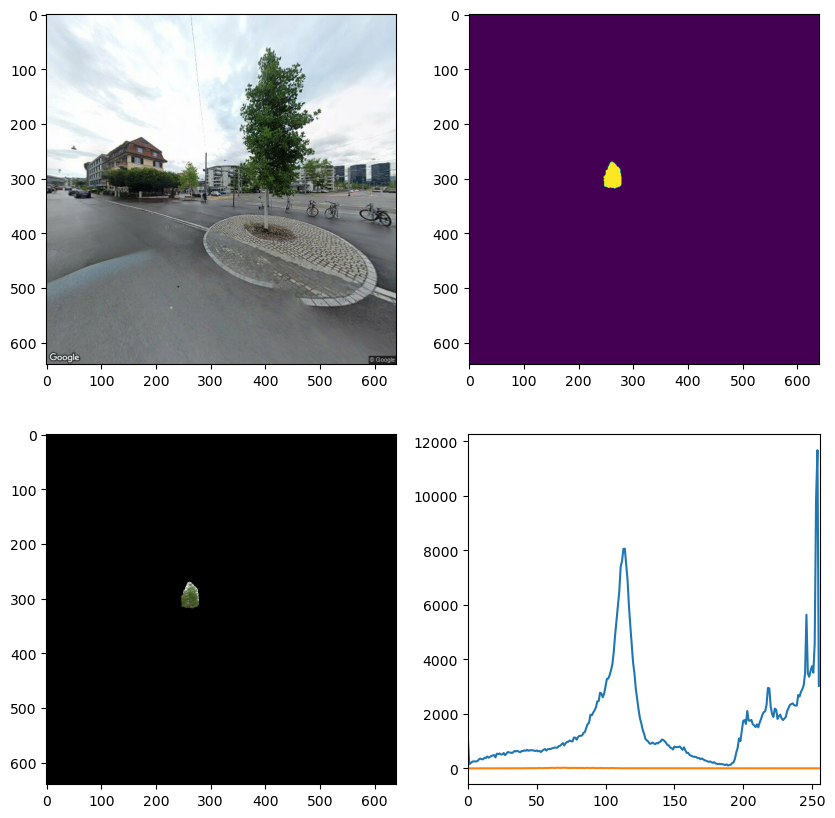

In [13]:
j = 0
mb = m1f[j]
img = gsv_image1[j]

i = 3

# t = 0
# p = ((df2[j]).iloc[t]['mask']) -1
# # print(t, p)
# i = p
# #i = 0
# print(i, t,'label')
maskedimg = cv2.bitwise_and(img,img,mask = mb[i])
# create a mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mb[i],[256],[0,256])
plt.figure(figsize = (10,10))
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(mb[i])
plt.subplot(223), plt.imshow(maskedimg)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [66]:
# Updated Function
## Filtering the masks which are too small (<=5) for contour feature/properties calculation
# Function to find and plot filtered contours (find-filter-plot-contour)
# Run for each mask of each image
def ffpcontour_noplot(image, mask, i):
    assert image is not None, "image file could not be read, check with os.path.exists()"
    assert mask is not None, "mask file could not be read, check with os.path.exists()"
    # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    ll = [] # length list
    for i in range(0, len(contours)):
          ll.append(len(contours[i]))
    maxl = max(ll)
    maxindex = ll.index(maxl)
    if (len(contours) == 1) and (maxl >= 6):
        contour_f = contours
    elif (maxl>=80) :
        contour_f = []
        for i in range(0, len(contours)):
        # print(i, "len", len(contours[i]))
            if (len(contours[i]) >= 80):
                contour_f.append(contours[i])
            else:
                contour_f = contour_f
    elif (maxl >= 6):
        contour_f = []
        contour_f.append(contours[maxindex])
    else: 
        contour_f = []
    return contour_f


# Updated 01022024
# Updated 08022024
# Add location coordinates of extreme points
# Add orientation(in fitEllipse) and angle of rotation(in rotated rectangle)
def cgr(contour):
    assert contour is not None, "image file could not be read, check with os.path.exists()"
    c = contour
    isconvex = cv2.isContourConvex(c) # Checking convexity
    (x,y), (w,h), ar = cv2.minAreaRect(c) # Rotated rectangle with minimum area
    ar_r = ar # Angle of rotation in rotated rectangle
    M = cv2.moments(c) # Moments
    area = cv2.contourArea(c) # Area 
    if (M['m00'] != 0):
        cx = int(M['m10']/M['m00']) # Centroid
        cy = int(M['m01']/M['m00'])
    else:
        cx = x
        cy = y
    xs,ys,ws,hs = cv2.boundingRect(c) # Straight bounding rectangle
    aspect_ratio_wh_s = float(ws)/hs # Aspect ratio
    extent_s = float(area)/(ws*hs) # Extent
    hull = cv2.convexHull(c) # Solidity
    hull_area = cv2.contourArea(hull)
    if (hull_area != 0):
        solidity = float(area)/hull_area
    else:
        solidity = 0
    aspect_ratio_wh = float(w)/h  # Aspect ratio
    extent = float(area)/(w*h) # Extent
    (xe,ye),(MA,ma),ae = cv2.fitEllipse(c)
    ar_e = ae # Angle of rotated ellipse, orientation
    ed = np.sqrt(4*area/np.pi) # Equivalent Diameter
    ratio_ell = float(ma)/MA
    perimeter = cv2.arcLength(c, True) # Arclength
    p_centroid = np.array([float(cx), float(cy)])
    p_masscenter = np.array([float(x), float(y)])
    # for the following two variable, positive (+1) = inside, negative (-1) = outside, or zero (0) = on an edge
    is_cen_inside = cv2.pointPolygonTest(c, p_centroid, False) # Checking if centroid is inside
    is_mce_inside = cv2.pointPolygonTest(c, p_masscenter, False) # Checking if mass center is inside
    leftmost = tuple(c[c[:,:,0].argmin()][0])
    rightmost = tuple(c[c[:,:,0].argmax()][0])
    topmost = tuple(c[c[:,:,1].argmin()][0])
    bottommost = tuple(c[c[:,:,1].argmax()][0])
    leftm = leftmost[0]
    rightm = rightmost[0]
    topm = topmost[1]
    bottomm = bottommost[1]
    return {
        'isconvex': isconvex,
        'area': area,
        'aspect_ratio_wh_s': aspect_ratio_wh_s,
        'extent_s': extent_s,
        'solidity': solidity,
        'aspect_ratio_wh': aspect_ratio_wh,
        'extent': extent,
        'orien_rre': ar_r,
        'orien_ell': ar_e,
        'ed': ed,
        'ratio_ell': ratio_ell,
        'perimeter': perimeter,
        'is_cen_inside': is_cen_inside,
        'is_mce_inside': is_mce_inside,
        'leftm': leftm,
        'rightm': rightm,
        'topm': topm,
        'bottomm': bottomm
    }


# Updated, differentiate isconvex and is_cen_inside
# Updated 01022024, add location coordinates of extreme points
def csga(contours):
    assert contours is not None, "image file could not be read, check with os.path.exists()"
    if len(contours) == 1:
        ga = cgr(contours[0])
    else:
        gal = []
        for i in range(0, (len(contours)-1)):
            gal.append(cgr(contours[i]))
        iscon = []
        al = []
        asps = []
        exts = []
        sol = []
        asp = []
        ext = []
        anr = []
        ane = []
        ed = []
        rate = []
        per = []
        iscen = []
        ismce = []
        lm = []
        rm = []
        tm = []
        bm = []
        for i in range(0, len(gal)):
            iscon.append(gal[0]['isconvex'])
            al.append(gal[0]['area'])
            asps.append(gal[0]['aspect_ratio_wh_s'])
            exts.append(gal[0]['extent_s'])
            sol.append(gal[0]['solidity'])
            asp.append(gal[0]['aspect_ratio_wh'])
            ext.append(gal[0]['extent'])
            anr.append(gal[0]['orien_rre'])
            ane.append(gal[0]['orien_ell'])
            ed.append(gal[0]['ed'])
            rate.append(gal[0]['ratio_ell'])
            per.append(gal[0]['perimeter'])
            iscen.append(gal[0]['is_cen_inside'])
            ismce.append(gal[0]['is_mce_inside'])
            lm.append(gal[0]['leftm'])
            rm.append(gal[0]['rightm'])
            tm.append(gal[0]['topm'])
            bm.append(gal[0]['bottomm'])
        isconvex = np.all(iscon)
        area = np.mean(al, axis = 0)
        aspect_ratio_wh_s = np.mean(asps, axis = 0)
        extent_s = np.mean(exts, axis = 0)
        solidity = np.mean(sol, axis = 0)
        aspect_ratio_wh = np.mean(asp, axis = 0)
        extent = np.mean(ext, axis = 0)
        ar_r = np.mean(anr, axis = 0)
        ar_e = np.mean(ane, axis = 0)
        ed = np.mean(ed, axis = 0)
        ratio_ell = np.mean(rate, axis = 0)
        perimeter = np.mean(per, axis = 0)
        is_cen_inside = np.mean(iscen, axis = 0)
        is_mce_inside = np.mean(ismce, axis = 0)
        leftm = np.min(lm, axis = 0)
        rightm = np.max(rm, axis = 0)
        topm = np.min(tm, axis = 0)
        bottomm = np.max(bm, axis = 0)
        ga = {
            'isconvex': isconvex,
            'area': area,
            'aspect_ratio_wh_s': aspect_ratio_wh_s,
            'extent_s': extent_s,
            'solidity': solidity,
            'aspect_ratio_wh': aspect_ratio_wh,
            'extent': extent,
            'orien_rre': ar_r,
            'orien_ell': ar_e,
            'ed': ed,
            'ratio_ell': ratio_ell,
            'perimeter': perimeter,
            'is_cen_inside': is_cen_inside,
            'is_mce_inside': is_mce_inside,
            'leftm': leftm,
            'rightm': rightm,
            'topm': topm,
            'bottomm': bottomm
        }
    return ga


# Updated - Remove the empty contour
# Updated - Convert true/false to 1/0
# Updated 01022024 - Add location coordinate value of extreme points
# Updated 01022024 - Add color 25% and 75% quantile values
# Updated 08022024 - Add orientation and angle of rotation
# mask file mf
def feature_summary(image, mf):
    # Generate a data frame for masks and attributes
    df = pd.DataFrame()
    df['mask'] = range(1, (len(mf)+1))
    df = df.assign(gmedian = None, rmedian = None, bmedian = None,
                   gmean = None, rmean = None, bmean = None,
                   gstd = None, rstd = None, bstd = None,
                   gq25 = None, gq75 = None, rq25 = None,
                   rq75 = None, bq25 = None, bq75 = None,
                   cdmean = None, cdstd = None,
                   isconvex = None, area = None, aspect_ratio_wh_s = None,
                   extent_s = None, solidity = None, aspect_ratio_wh = None,
                   extent = None, orien_rre = None, orien_ell = None,
                   ed = None, ratio_ell = None,
                   perimeter = None, is_cen_inside = None, is_mce_inside = None,
                   leftm = None, rightm = None, topm = None, 
                   bottomm = None)
    mm = [] # masked image
    for i in range(0, len(mf)):
        mm.append(cv2.bitwise_and(image, image, mask = mf[i]))
    mib = []
    mig = []
    mir = []
    for i in range(0, len(mm)):
        mib.append((mm[i][:,:,0])[np.where(((mm[i][:,:,0]) != 0) | ((mm[i][:,:,1]) != 0) | ((mm[i][:,:,2]) != 0))])
        mig.append((mm[i][:,:,1])[np.where(((mm[i][:,:,0]) != 0) | ((mm[i][:,:,1]) != 0) | ((mm[i][:,:,2]) != 0))])
        mir.append((mm[i][:,:,2])[np.where(((mm[i][:,:,0]) != 0) | ((mm[i][:,:,1]) != 0) | ((mm[i][:,:,2]) != 0))])
    cm, cs = coldistance(mig, mib, mir)
    for i in range(0, len(mm)):
        df.at[i, 'bmean'] = np.mean(mib[i], axis = 0)
        df.at[i, 'gmean'] = np.mean(mig[i], axis = 0)
        df.at[i, 'rmean'] = np.mean(mir[i], axis = 0)
        df.at[i, 'bmedian'] = np.median(mib[i], axis = 0)
        df.at[i, 'gmedian'] = np.median(mig[i], axis = 0)
        df.at[i, 'rmedian'] = np.median(mir[i], axis = 0)
        df.at[i, 'bstd'] = np.std(mib[i], axis = 0)
        df.at[i, 'gstd'] = np.std(mig[i], axis = 0)
        df.at[i, 'rstd'] = np.std(mir[i], axis = 0)
        df.at[i, 'bq25'] = np.quantile(mib[i], 0.25, axis = 0)
        df.at[i, 'bq75'] = np.quantile(mib[i], 0.75, axis = 0)
        df.at[i, 'gq25'] = np.quantile(mig[i], 0.25, axis = 0)
        df.at[i, 'gq75'] = np.quantile(mig[i], 0.75, axis = 0)
        df.at[i, 'rq25'] = np.quantile(mir[i], 0.25, axis = 0)
        df.at[i, 'rq75'] = np.quantile(mir[i], 0.75, axis = 0)
        df.at[i, 'cdmean'] = cm[i]
        df.at[i, 'cdstd'] = cs[i]
    for i in range(0, len(mf)):
        con = ffpcontour_noplot(image, mf, i)
        if len(con) != 0 :
            df.at[i, 'isconvex'] = csga(con)['isconvex']
            df.at[i, 'area'] = csga(con)['area']
            df.at[i, 'aspect_ratio_wh_s'] = csga(con)['aspect_ratio_wh_s']
            df.at[i, 'extent_s'] = csga(con)['extent_s']
            df.at[i, 'solidity'] = csga(con)['solidity']
            df.at[i, 'aspect_ratio_wh'] = csga(con)['aspect_ratio_wh']
            df.at[i, 'extent'] = csga(con)['extent']
            df.at[i, 'ed'] = csga(con)['ed']
            df.at[i, 'orien_rre'] = csga(con)['orien_rre']
            df.at[i, 'orien_ell'] = csga(con)['orien_ell']
            df.at[i, 'ratio_ell'] = csga(con)['ratio_ell']
            df.at[i, 'perimeter'] = csga(con)['perimeter']
            df.at[i, 'is_cen_inside'] = csga(con)['is_cen_inside']
            df.at[i, 'is_mce_inside'] = csga(con)['is_mce_inside']
            df.at[i, 'leftm'] = csga(con)['leftm']
            df.at[i, 'rightm'] = csga(con)['rightm']
            df.at[i, 'topm'] = csga(con)['topm']
            df.at[i, 'bottomm'] = csga(con)['bottomm']
        else :
            df.at[i, 'isconvex'] = np.nan
            df.at[i, 'area'] = np.nan
            df.at[i, 'aspect_ratio_wh_s'] = np.nan
            df.at[i, 'extent_s'] = np.nan
            df.at[i, 'solidity'] = np.nan
            df.at[i, 'aspect_ratio_wh'] = np.nan
            df.at[i, 'extent'] = np.nan
            df.at[i, 'ed'] = np.nan
            df.at[i, 'orien_rre'] = np.nan
            df.at[i, 'orien_ell'] = np.nan
            df.at[i, 'ratio_ell'] = np.nan
            df.at[i, 'perimeter'] = np.nan
            df.at[i, 'is_cen_inside'] = np.nan
            df.at[i, 'is_mce_inside'] = np.nan
            df.at[i, 'leftm'] = np.nan
            df.at[i, 'rightm'] = np.nan
            df.at[i, 'topm'] = np.nan
            df.at[i, 'bottomm'] = np.nan
    # Remove the rows with na
    df = df.dropna()
    # Convert true/false to 1 and 0
    df = df.replace({True: 1, False: 0})
    return df


In [67]:
dftest = feature_summary(img, mb)

In [68]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 42
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               42 non-null     int64  
 1   gmedian            42 non-null     float64
 2   rmedian            42 non-null     float64
 3   bmedian            42 non-null     float64
 4   gmean              42 non-null     float64
 5   rmean              42 non-null     float64
 6   bmean              42 non-null     float64
 7   gstd               42 non-null     float64
 8   rstd               42 non-null     float64
 9   bstd               42 non-null     float64
 10  gq25               42 non-null     float64
 11  gq75               42 non-null     float64
 12  rq25               42 non-null     float64
 13  rq75               42 non-null     float64
 14  bq25               42 non-null     float64
 15  bq75               42 non-null     float64
 16  cdmean             42 non-null   

In [71]:
dftest[['mask','orien_rre','orien_ell']]

,mask,orien_rre,orien_ell
0,1,90.000000,94.051880
1,2,21.223658,104.332214
2,3,90.000000,96.341446
3,4,90.000000,2.729903
4,5,0.000000,125.760727
5,6,74.931511,72.226242
6,7,9.334999,178.854340
8,9,90.000000,93.134140
9,10,16.389542,176.934952
10,11,26.565050,112.329727


In [81]:
i = i+1
c = ffpcontour_noplot(img, mb, i)
c0 = c[0]

In [82]:
cv2.minAreaRect(c0)

((319.5, 149.0), (298.0, 639.0), 90.0)

In [83]:
cv2.fitEllipse(c0)

((184.3883056640625, 155.74349975585938),
 (260.421875, 738.3353271484375),
 96.34144592285156)

<function matplotlib.pyplot.show(close=None, block=None)>

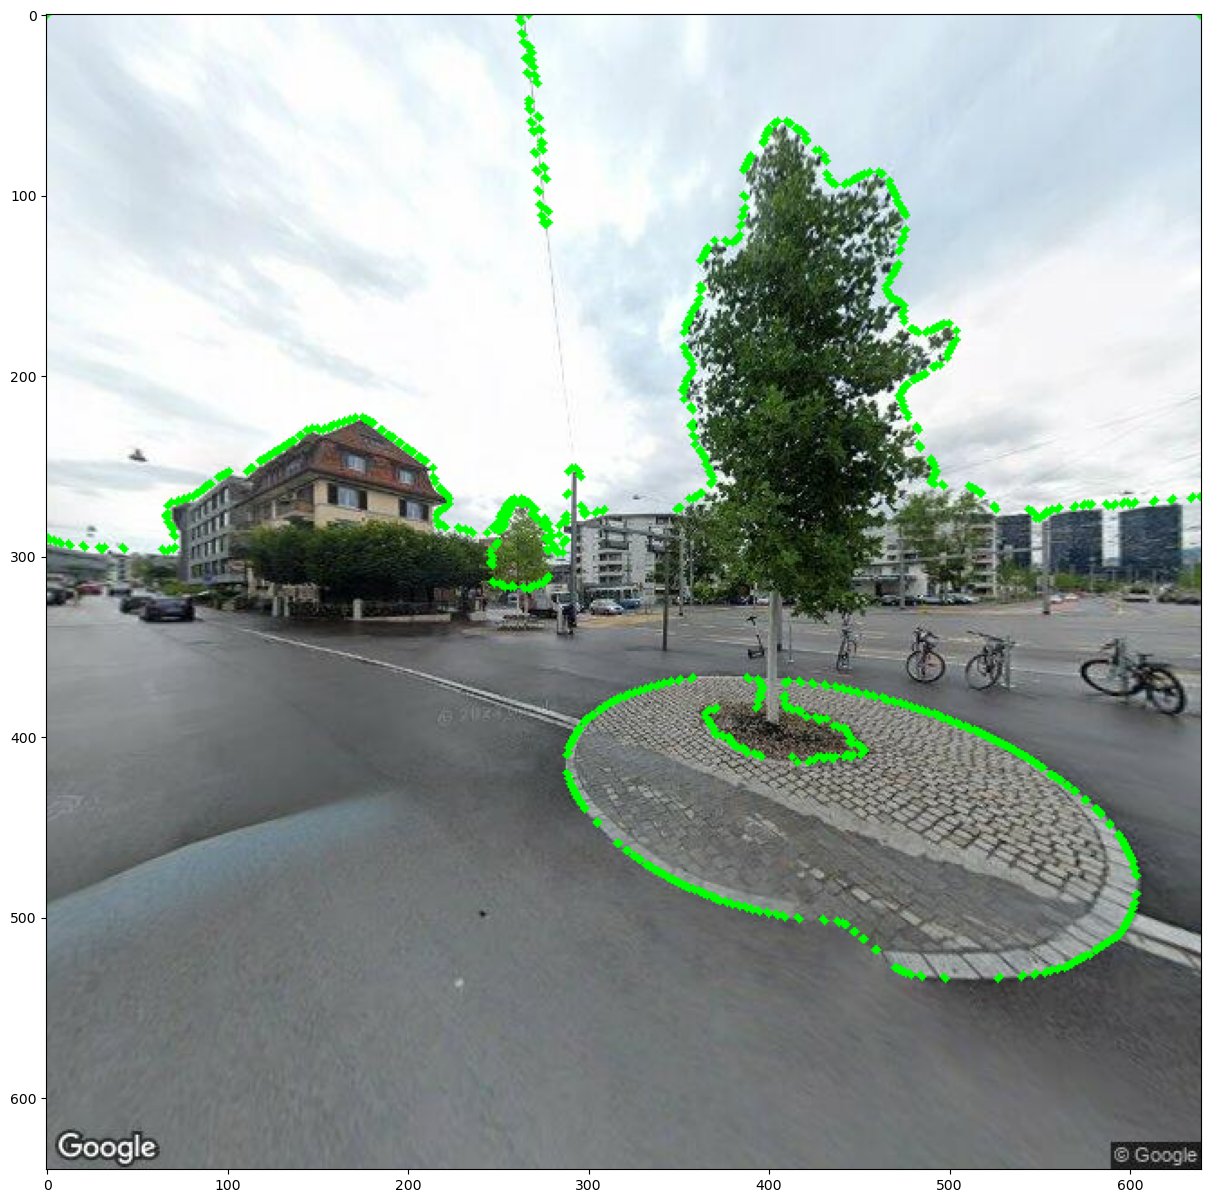

In [84]:
img0 = img
img_con = cv2.drawContours(img0, c0, -1, (0,255,0), 3) 
plt.figure(figsize = (15,15))
plt.imshow(img_con)
plt.axis('on')
plt.show

In [19]:
leftmost = tuple(c0[c0[:,:,0].argmin()][0])
rightmost = tuple(c0[c0[:,:,0].argmax()][0])
topmost = tuple(c0[c0[:,:,1].argmin()][0])
bottommost = tuple(c0[c0[:,:,1].argmax()][0])
print(leftmost, rightmost, topmost, bottommost)

(246, 297) (278, 311) (260, 270) (265, 318)


In [20]:
print(leftmost[0], rightmost[0], topmost[1], bottommost[1])

246 278 270 318


In [21]:
def lineseg_dist(p, a, b):

    # normalized tangent vector
    d = np.divide(b - a, np.linalg.norm(b - a))

    # signed parallel distance components
    s = np.dot(a - p, d)
    t = np.dot(p - b, d)

    # clamped parallel distance
    h = np.maximum.reduce([s, t, 0])

    # perpendicular distance component
    c = np.cross(p - a, d)

    return np.hypot(h, np.linalg.norm(c))

In [22]:
def coldistance(mig, mib, mir):
    cdmean = []
    cdstd = []
    for i in range(0,len(mib)):
        cg = mig[i]
        cr = mir[i]
        cb = mib[i]
        diss = []
        t2 = np.array([0,0,0])
        t3 = np.array([255,255,255])
        for j in range(0, len(cg)):
            diss.append(lineseg_dist(np.array([cg[j], cr[j], cb[j]]), t2, t3))
        cdmean.append(np.mean(diss))
        cdstd.append(np.std(diss))
    return cdmean, cdstd

### Apply the new functions

In [23]:
il = [283, 193, 38, 224, 27, 66, 174, 77, 160, 182]

In [72]:
df1r = []
df2r = []
df3r = []
df4r = []
for i in range(0, 10):
    a = il[i]
    df1r.append(feature_summary(gsv_image1[a], m1f[a]))
    df2r.append(feature_summary(gsv_image2[a], m2f[a]))
    df3r.append(feature_summary(gsv_image3[a], m3f[a]))
    df4r.append(feature_summary(gsv_image4[a], m4f[a]))
    print(i, a)


0 283
1 193
2 38
3 224
4 27
5 66
6 174
7 77
8 160
9 182


In [73]:
df1 = []
df2 = []
df3 = []
df4 = []
for i in range(0, 10):
    df1.append(feature_summary(gsv_image1[i], m1f[i]))
    df2.append(feature_summary(gsv_image2[i], m2f[i]))
    df3.append(feature_summary(gsv_image3[i], m3f[i]))
    df4.append(feature_summary(gsv_image4[i], m4f[i]))
    print(i)

0
1
2
3
4
5
6
7
8
9


In [104]:
# Labelling
# Manual Labeling
df1[0] = df1[0].assign(label = ['s', 'pa', 's', 'p', 'r', 'b', 'p', 'p',
                                'bi', 'bi', 'b', 'o', 't', 'b', 'bi', 'b',
                                'b', 'p', 'b', 'v', 'b', 'v', 'p', 'ct',
                                'b', 'p', 'o', 'p', 'o', 'bi', 'p', 'v',
                                'p', 'v', 'h', 'curb', 'o', 'ep', 'o', 'ct',
                                'o',  'curb'])
df1[1] = df1[1].assign(label = ['s', 'r', 'r', 'p', 't', 'p', 'p', 'o',
                                'p', 'r', 'p', 'o', 'p', 'o', 'p', 'h',
                                'pa', 'r', 'o', 'm', 'p', 'p', 'o', 'o', 
                                'o', 'p', 'o','o', 't',  'p', 'o', 'o',
                                'p', 'p', 't', 'r', 'r',  'o', 'rs', 'o',  
                                'rgs', 'p', 'p', 'o', 'p', 'o', 'p', 'o', 
                                'p', 'sl', 'o', 'o', 'sl','o', 'o', 'o',
                                'o', 'ct', 'o'])
df1[2] = df1[2].assign(label = ['r', 's', 'p', 'p', 'b', 't', 'r', 's', 
                                'b', 'p', 'b', 'p', 'p', 'o', 'v', 'p', 
                                'o', 'b', 'b', 'b', 'p', 'vp', 'v', 'b',
                                'p', 'v', 'p', 'b', 'p', 'b', 'p', 'p',
                                'p', 'o', 'p', 'p', 'curb', 'p', 'o', 'vp', 
                                'o', 'v', 'v'])
df1[3] = df1[3].assign(label = ['s', 'r', 's', 'p', 'v', 'o', 'v', 'rgs', 
                                'v', 'p', 'v', 'o', 'v', 'p', 'p', 'o', 
                                'p', 'o', 'p', 'rgs', 'p', 'b', 'o', 'p', 
                                'p', 'p', 'v', 'p', 'p', 'rgs', 'p', 'p', 
                                'o', 'p', 'o', 'o', 'o', 'p', 'o', 'v', 
                                'o', 'rgs', 'o', 'o', 'p', 'p', 'o', 'o', 
                                'v', 't', 'o', 'o', 'mo', 'p', 'p', 'o', 
                                'o', 'o', 'sl'])
df1[4] = df1[4].assign(label = ['s', 'r', 'p', 'v', 'b', 'p', 'p', 'vp', 
                                'rgs', 'p', 'p', 't', 'p', 'r', 'o', 'p', 
                                'pa', 'o', 'rs', 'p', 'p', 'o', 'o', 'rs', 
                                'p', 'p', 'p', 'o', 'o', 'p', 'vp', 'o', 
                                'o', 'o', 'o', 'rs', 'rs', 'o', 'p', 'm', 
                                'vp', 'vp', 'o', 'p', 'vp'])
df1[5] = df1[5].assign(label = ['s', 'b', 's', 'bw', 't', 'ra', 't', 'o', 
                                'b', 'pa', 'o', 'o', 'b', 'o', 'p', 'o', 
                                'o', 'o', 'o', 'o', 'b', 'o', 'o', 'o', 
                                'o', 'o', 'o'])
df1[6] = df1[6].assign(label = ['v', 'b', 'pa', 'b', 'b', 's', 'v', 'p', 
                                'b', 'b', 'curb', 'o', 't', 'p', 'v', 'v', 
                                'rs', 'o', 'rgs', 'o', 'p', 'o', 'vp', 'o', 
                                'o', 'o', 'rs', 'o', 'p', 'p', 'o', 'o', 
                                'o', 'p', 'o', 'o', 'v', 'v', 'vp', 'o', 
                                'sl', 'vp', 'o', 'b', 'p', 'b', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'v'])
df1[7] = df1[7].assign(label = ['b', 'r', 's', 'b', 'm', 'o', 'o', 'o', 
                                'p', 'o', 'o', 'o', 'r', 'o', 'o', 'b', 
                                'o', 'p', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'b', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'b', 'o', 'p', 'o', 'o', 'p', 'o', 'o', 
                                'p', 'v', 'o', 'v', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'v', 
                                'o', 'v', 'o', 'b'])
df1[8] = df1[8].assign(label = ['s', 'b', 'r', 'pa', 'o', 'o', 'p', 'o',  
                                'p', 't', 'curb', 'p', 'p', 'p', 'o', 'o', 
                                'ct', 'o', 'p', 'o', 'o', 'p', 'ct', 'p', 
                                'p', 'o', 'p', 's', 'o', 'o', 'ct', 'b'])
df1[9] = df1[9].assign(label = ['s', 'r', 'o', 'b', 'bus', 'rgs', 't', 'r',
                                'p', 'm', 'rgs', 'o', 'p', 'curb', 'o', 'o',
                                'o', 'p', 'rgs', 'sl', 'h', 'rgs', 'o', 'o', 
                                'rgs', 'p', 'o', 't', 'h', 'o', 'p', 't',  
                                'o', 'rgs', 'p', 'rgs', 'o', 'p', 'h', 'ep', 
                                'o', 'sw', 'h', 'o', 'o', 'o', 'o', 'o', 
                                'h', 'ep', 'b', 'o', 'o', 'o', 'o', 'o', 
                                'h', 'o', 'o', 'o'])



df2[0] = df2[0].assign(label = ['r', 'pa', 's', 'p', 'b', 'b', 'b', 't',
                                's', 'bi', 'p', 'bi', 'pa', 'o','v', 'pa',
                                'p', 'pa','b','o', 'p','ep', 'bi', 'p',
                                'b', 'b', 'p', 'bi','p', 'p', 'ct', 'bi',
                                'curb', 'b', 'b', 'bi', 'b', 'pa','ep', 'o',
                                'o','o', 'o','o'])
df2[1] = df2[1].assign(label = ['s', 'r', 'p', 's', 'r', 'p','t', 'b', 
                                'b', 'r', 'curb', 'sw', 'curb', 'o', 'o','o',
                                'rgs', 'o', 'o', 'b', 'o', 'p', 'sl', 'o',
                                'rs', 'o', 'sl','p', 'o', 'o', 'o', 'o',
                                'rs', 'p'])
df2[2] = df2[2].assign(label = ['s', 'b', 'r', 'b', 'rgs', 'v', 'b', 'rgs',
                                'rgs', 't', 'p', 'rgs', 's', 'p', 'p', 'o',
                                's', 'pa', 'rgs', 'pa', 'pa', 'p', 'p', 'b',
                                'pa', 'pa', 'rgs', 'o', 'p', 'o', 'b', 'b',
                                'p', 'o', 'p', 'curb', 'sl', 'b', 'p', 'b', 
                                'p', 'pa', 'vp', 'p', 'rgs', 'o', 'rs', 'rgs',
                                'p', 'o', 'p', 'p', 'p', 'rgs', 'o', 'b',
                                'ct', 'o', 'p', 'p'])
df2[3] = df2[3].assign(label = ['s', 'r', 'p', 'p', 'o', 'v', 'p', 't',  
                                'p', 'rgs', 'v', 'p', 'o', 'o', 'vp', 'o',
                                'b', 'v', 'rgs', 'v', 'b', 'o', 'rgs', 'vp',
                                'o', 'o', 'o', 'o', 'o', 'o', 'p', 'b',
                                'p', 'rgs', 'o', 'o', 'o', 'o', 'v', 'o',
                                'o', 'o', 'rgs', 'o', 'o', 'o'])
df2[4] = df2[4].assign(label = ['b', 's', 'v', 'b', 'p', 'r', 'r', 'b', 
                                'vp', 'b', 'p', 'o', 'v', 'p', 's', 't', 
                                'pa', 'p', 'v', 'o', 'p', 'o', 'o', 'o', 
                                'o', 'p', 'b', 'r', 'p', 'pa', 'o', 'vp', 
                                'o', 'o', 'p', 'b', 'p', 'p', 'v', 'o', 
                                'o', 'o', 'b', 'o'])
df2[5] = df2[5].assign(label = ['r', 's', 'ra', 'ra', 'ra', 'bw', 'o', 'o', 
                                'b', 'bw', 'bw', 'bw', 'o', 'v', 'o', 'o', 
                                'o', 'o', 'v', 'o', 'o', 'b', 'curb', 'o', 
                                'b', 'sw', 'o', 'o', 'curb', 'v', 'o', 'o', 
                                'sw', 'o', 'v', 'o', 'o', 'o', 'sw', 'o', 
                                'o', 'o', 'v', 'o' ])
df2[6] = df2[6].assign(label = ['b', 'r', 'b', 's', 'o', 'o', 'o', 't', 
                                'o', 'o', 'o', 't', 'o', 'o', 'p', 'o', 
                                'o', 'p', 'o', 'o', 'o', 'v', 'o', 'o', 
                                'b', 'p', 'p', 'o', 'o', 'o', 'vp', 'o', 
                                'o', 'o', 'p', 'o', 'o', 'o', 'o', 'p', 
                                'vp', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o'])
df2[7] = df2[7].assign(label = ['s', 'r', 'm', 'p', 'train', 's', 'o', 'o', 
                                'train', 'o', 't', 'o', 'o', 'b', 'b', 'o', 
                                'o', 'o', 'o', 'o', 'b', 'o', 'o', 'o', 
                                'o', 'b', 'o', 'o', 'o', 'o', 'o', 'b', 
                                'o', 'o', 'o', 'pa', 'curb', 'o', 'o', 'o', 
                                'sl', 'm', 'o', 'o', 'o', 'o', 'o', 'p', 
                                'ra', 'r', 'o', 'o', 'pa', 'o', 'b', 'o', 
                                'o', 'o', 'p', 'o', 'o', 'o', 'o', 'sw', 
                                'o', 'o', 'o', 'o', 'o', 'p', 'train', 'o', 
                                'o', 'o', 'm', 'o', 'o', 'o', 'o', 'o'])
df2[8] = df2[8].assign(label = ['s', 'b', 'r', 'o', 'o', 't', 'pa', 'rgs',
                                'p', 'p', 'pa', 'rgs', 'rgs', 'o', 'p', 'ct',
                                'rgs', 'p', 'p', 'p', 'rgs', 'p', 'pa', 'p',
                                'o', 'o', 'p', 'o', 'o', 'p', 'curb', 'v',
                                'o', 'rs', 'p', 'sl', 'rgs', 'o', 'b', 'p',
                                'rgs', 'rgs', 'o', 'o'])
df2[9] = df2[9].assign(label = ['s', 'r', 'o', 'p', 'b', 'o', 'r', 'o',
                                't', 'o', 'r', 'b', 'p', 'b', 'p', 'o',
                                'o', 'curb', 'rgs', 'p', 'm', 'curb', 'b', 'o',
                                'h', 'o', 'p', 'o', 'o', 'o', 'b', 'b',
                                'h', 'o', 'h', 'o', 'o', 'o', 'o', 'o',
                                'o', 'ep', 'b', 'sw', 'sw', 'rgs', 'o', 'o',
                                'o', 'sw', 'o'])


df3[0] = df3[0].assign(label = ['r', 's', 'b', 'pa', 'o', 'm', 'b', 'v',
                                't', 'o', 'o', 'o', 'o', 'o', 'b','o',
                                'o', 'o', 'b', 'o', 'o', 'o', 'pm', 'p',
                                'b', 'b', 'p', 'p', 'o', 'pa', 'o', 'o',
                                'vp', 'p', 'p', 'o', 'o', 'sw', 'ep', 'ep', 
                                'sw', 'b'])
df3[1] = df3[1].assign(label = ['s', 'p', 'p', 'r', 'p', 't', 'p', 'r',
                                'r', 'b', 'r', 'sw', 'r', 'p', 'sl', 'r', 
                                'o', 'curb', 'rgs', 'ep', 'o', 'rgs', 'p', 'p' ])
df3[2] = df3[2].assign(label = ['s', 'b', 'rgs', 'r', 'r', 'r', 'rgs', 's', 
                                'p', 'rgs', 'p', 'rgs', 'rgs', 'p', 'h', 'p', 
                                'b', 'o', 'p', 'b', 'o', 'p', 'curb', 'curb', 
                                'o', 'pa', 'o', 'o', 'o', 'b', 'o', 'vp', 
                                'o', 'b', 'o', 'p', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'p', 'p', 'b', 'b', 'v', 'pa', 
                                'b', 'vp', 'o', 'p', 'v', 'o', 'o', 'o', 
                                'o', 'o'])
df3[3] = df3[3].assign(label = ['s', 'r', 'p', 'v', 'o', 'v', 'v', 'p', 
                                'p', 'v', 'vp', 'vp', 't', 'p', 'vp', 'vp', 
                                'vp', 'v', 'o', 'rgs', 'vp', 'p', 't', 'o', 
                                'o', 'curb', 'vp', 'p', 'vp', 'o', 'o', 's', 
                                'p', 'p', 'p', 'o', 't', 'o', 'o' ])
df3[4] = df3[4].assign(label = ['s', 'r', 'b', 'pa', 't', 'p', 'v', 'p', 
                                'p', 'm', 'm', 'p', 'p', 'curb', 'p', 'p', 
                                'm', 'bp', 'm', 'p', 'm', 'p', 's', 'p', 
                                'b', 'p', 'mb', 'p', 'b', 'o', 'p', 'b', 
                                'v', 'o', 'p', 'p', 'p', 'o', 'sl' ])
df3[5] = df3[5].assign(label = ['s', 's', 'b', 'b', 'b', 'b', 'r', 'b', 
                                'v', 'o', 'b', 'o', 'o', 'o', 'o', 'ra', 
                                'o', 'v', 'o', 'v', 'o', 'b', 'o', 'v', 
                                'v', 'o', 'o', 'o', 'h', 'o', 'o', 'v' ])
df3[6] = df3[6].assign(label = ['pa', 'b', 'b', 'v', 'v', 'r', 'p', 'b', 
                                'b', 'b', 'o', 'o', 'o', 'o', 't', 'v', 
                                'p', 'o', 'o', 'o', 'p', 'o', 'b', 'o', 
                                'b', 'o', 'o', 'vp', 'v', 'o', 's', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'v', 'p', 
                                'o', 'p', 'o', 'o', 'o', 'b', 'o', 'o', 
                                'o', 'o', 'v', 'o', 'vp'])
df3[7] = df3[7].assign(label = ['s', 'r', 'b', 'train', 'o', 'o', 'o', 't', 
                                'pa', 'train', 'b', 'o', 'o', 'm', 'b', 'o', 
                                'o', 'o', 'o', 'o', 'b', 'p', 'o', 'o', 
                                'o', 'b', 'o', 'p', 'sw', 'b', 'o', 'sw', 
                                'o', 'o', 'p', 'o'])
df3[8] = df3[8].assign(label = ['r', 's', 'b', 'b', 't', 't', 'p', 'pa', 
                                'o', 'o', 'p', 'o', 'p', 'p', 'o', 'p', 
                                'p', 'b', 'b', 'p', 't', 'o', 'p', 'rgs', 
                                'rgs', 'p', 'o', 'p', 'p', 'o', 'o', 'p', 
                                'p', 'p', 'rs', 'p', 'o', 'curb', 'b', 'p', 
                                'b', 'o', 'o', 'p', 'rgs', 'o'])
df3[9] = df3[9].assign(label = ['r', 's', 'b', 'p', 'b', 't', 'r', 'b', 
                                'b', 'b', 'b', 'ts', 'b', 'b', 'r', 't',
                                'b', 'b', 'rgs', 'o', 't', 'o', 'b', 'o', 
                                'o', 'b', 'curb', 'o', 'b', 'p', 'b', 'o', 
                                'p', 'p', 'p', 'b', 'o' ])


df4[0] = df4[0].assign(label = ['s', 'r', 'pa', 'p', 'b', 'b', 'p', 'b', 
                                't', 'o', 'o', 'v', 'm', 'b', 'p', 'v', 
                                'p', 'b', 'o', 'p', 'v', 'o', 'o', 'p', 
                                'o', 'o', 'b', 'b', 'p', 'pa', 'o', 'o', 
                                'p', 'o', 'o', 'o', 'o'])
df4[1] = df4[1].assign(label = ['s', 'o', 'p', 'o', 'p', 'm', 'o', 'o', 
                                'v', 'p', 'o', 'p', 'm', 'p', 'p', 'o', 
                                'p', 'p', 'p', 'o', 'h', 'o', 'p', 'p', 
                                'm', 'o', 'b', 'o', 'o', 'p', 'p', 'o', 
                                'rgs', 'rgs', 'r', 'p', 'p', 'p', 'o', 'o', 
                                'rs', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'ct', 'o'])
df4[2] = df4[2].assign(label = ['r', 's', 'p', 't', 's', 'p', 'p', 'b', 
                                'b', 'b', 'b', 'p', 'o', 'p', 'b', 'b', 
                                'b', 'p', 'p', 'p', 'o', 'b', 'h', 'p', 
                                'p', 'p', 'p', 'b', 'p', 'o', 'h', 'o', 
                                'b', 'o', 'ep', 'o', 'p', 'v', 'o', 'o', 
                                'b', 'o'])
df4[3] = df4[3].assign(label = ['r', 'v', 'v', 's', 'v', 'vp', 'vp', 'p', 
                                'rgs', 'rgs', 'p', 't', 'p', 'p', 'b', 'o', 
                                'v', 'vp', 'vp', 'curb', 'o', 'p', 'o', 'vp', 
                                'o', 'vp', 'o', 'p', 'vp', 'o', 'p', 'o', 
                                'o', 'rs', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'p', 'sl', 'ep', 'o'])
df4[4] = df4[4].assign(label = ['s', 'pa', 's', 'p', 'r', 't', 'r', 'm', 
                                'p', 'p', 'p', 'o', 'p', 'p', 'p', 'p', 
                                'p', 'm', 'o', 'm', 'p', 'o', 'pa', 'p', 
                                'p', 'o', 'p', 'p', 'p', 'rgs', 'p', 'm', 
                                'o', 'm', 'r', 'r', 'p', 'p', 'rgs', 'o', 
                                'o', 'sl', 'p', 'p', 'p', 'o', 'p', 'p', 
                                'sl', 'o', 'o', 'p', 'pa', 'rs'])
df4[5] = df4[5].assign(label = ['s', 'b', 'r', 'ra', 'b', 'ra', 'o', 'bw', 
                                'bw', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 
                                'sw', 'b', 'o', 'o', 'curb', 'b', 'o', 'o', 
                                'curb', 'sw'])
df4[6] = df4[6].assign(label = ['v', 'b', 's', 'b', 'v', 'r', 'b', 'v', 
                                'r', 'rgs', 'vp', 'vp', 'b', 'vp', 'v', 'v', 
                                'v', 'v', 't', 'v', 'v', 'p', 'sl', 'vp', 
                                'rs', 'sl', 'o', 'o', 'v', 'vp', 'o'])
df4[7] = df4[7].assign(label = ['r', 's', 'b', 'train', 'pa', 'o', 'b', 'b', 
                                't', 'b', 'b', 'b', 'o', 'v', 'o', 'o', 
                                'b', 'v', 'p', 'o', 'b', 'o', 'p', 'sw', 
                                'v', 'o', 'o', 'curb', 'o', 'o', 'o', 'sl', 
                                'b', 'o', 'o', 'o', 'p'])
df4[8] = df4[8].assign(label = ['s', 'o', 'r', 'b', 'o', 'p', 'p', 'o', 
                                'p', 'pa', 't', 'p', 'p', 'o', 'p', 'rs', 
                                'p', 'p', 'p', 'p', 't', 'o', 'p', 'rgs', 
                                'p', 'o', 'p', 'p', 'p', 'p', 'rs', 'pa', 
                                'p', 'p', 'o', 'p', 'm', 'rgs', 'o', 'p', 
                                'p', 'rgs', 'rs', 'rgs', 'p', 'o', 'o', 'o', 
                                'o', 'o'])
df4[9] = df4[9].assign(label = ['s', 'train', 'r', 'b', 'r', 'b', 't', 'b', 
                                'p', 'o', 'b', 'curb', 'rgs', 'r', 'v', 'p', 
                                'p', 'o', 'o', 'v', 'b', 'o', 'r', 'o', 
                                'o', 'o', 'sl', 'p', 'curb', 'o', 'curb', 'b', 
                                'o', 'o', 'p', 'b', 'o', 'o', 'o', 'o', 
                                'sl', 'o', 'rgs', 'b', 'curb', 'o', 'o', 'h', 
                                'o', 'sw', 't', 'o', 'rgs', 'o', 'o', 'o', 
                                'sw', 'rgs', 'o', 'sw', 'o', 'o', 'o'])

df1r[0] = df1r[0].assign(label = ['s', 'tram', 'r', 'rgs', 'p', 'v', 'tram', 'b',
                                  'pa', 'rgs', 'rgs', 'p', 'p', 'rgs', 'rgs', 'o',
                                  'rgs', 'v', 'p', 'rgs', 'o', 'rgs', 'p', 'p', 
                                  'rs', 'v', 'sl', 'ep', 'o', 'h', 'o', 'o', 
                                  'o', 'rgs', 'p', 'ep', 'ep', 'o', 'sw', 'sw',
                                  'p', 'o', 'o', 'p', 'sl', 'o', 'o', 'vp', 
                                  'o', 'o', 'p', 'ep', 'sw'])
df1r[1] = df1r[1].assign(label = ['o', 'r', 's', 'o', 'b', 'b', 'b', 'o',
                                  'p', 'b', 'o', 'p', 'b', 'b', 'b', 'o',
                                  'o', 'o', 'o', 'o', 'h', 'o', 't', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'h', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'h', 
                                  'h', 'h', 'o', 'o', 'h', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'p', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o'])
df1r[2] = df1r[2].assign(label = ['pa', 'b', 's', 'b', 'bl', 't', 'o', 'b', 
                                  'r', 'rgs', 'b', 'rgs', 't', 'rgs', 'rgs', 'r', 
                                  'pa', 'o', 'b', 'o', 'rgs', 'b', 'p', 'p', 
                                  'p', 'rgs', 'o', 'p', 'p', 'p', 'p', 'p', 
                                  'p', 'o', 'p', 'o', 'rgs', 'p', 'o', 'rgs', 
                                  'rgs', 'z', 'b', 'sw', 'p', 'rgs', 'p', 'o', 
                                  'rs', 'o', 'o', 'sw', 'rgs', 'p'])
df1r[3] = df1r[3].assign(label = ['v', 'p', 'b', 'r', 'p', 'o', 'p', 'sp',
                                  'o', 'p', 't', 'p', 'pa', 'o', 'p', 'b', 
                                  'rgs', 'b', 'p', 'rs', 'o', 'o', 'o', 'o',
                                  'o', 'b', 'b', 'p', 'vp', 'o', 'o', 'b', 
                                  'ri', 'p', 'o', 'b', 'curb', 'o', 'p', 'b',
                                  'p', 'o', 'b', 'o', 'o', 'sw', 'ri', 'o',
                                  'sw', 'vp', 'o', 'o', 'b', 'b', 'b', 'b',
                                  'b', 'sw'])
df1r[4] = df1r[4].assign(label = ['s', 'r', 'p', 's', 'p', 'o', 'rs', 'p', 
                                  'p', 't', 'pa', 'p', 'p', 'b', 'rgs', 'p', 
                                  'p', 'p', 'p', 't', 'b', 'rgs', 'rgs', 'sl', 
                                  'rgs', 'rgs', 'bp', 'o', 'rgs', 'o', 'rs', 'rgs', 
                                  'rgs', 'o', 'o', 'v', 'b', 'mo', 'b', 'p', 
                                  'p', 'b', 'p', 'o', 'rgs'])
df1r[5] = df1r[5].assign(label = ['r', 'r', 'b', 'bp', 'bp', 'bp', 'bp', 'o', 
                                  'bp', 'bp', 'bp', 'bp', 'bp', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o'])
df1r[6] = df1r[6].assign(label = ['b', 'r', 'p', 's', 'p', 'v', 'p', 'p', 
                                  'r', 'b', 'o', 'bip', 'o', 'bl', 'b', 'vp', 
                                  'b', 'bi', 'p', 'b', 'bl', 'rgs', 'bip', 'o', 
                                  'p', 'p', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'h', 'sp', 'pa', 'sp', 'o', 'v', 'p', 
                                  'o', 'o', 'p', 'pa', 'o', 'b', 'o', 'sw', 
                                  'o', 'o', 'o', 'o', 'o', 'o'])
df1r[7] = df1r[7].assign(label = ['r', 'rb', 'r', 'o', 'o', 'pa', 'b', 'rs', 
                                  'o', 'o', 'o', 'bip', 'bp', 'bip', 'o', 'bp', 
                                  'r', 't', 'o', 'bip', 'o', 'o', 'bip', 'o', 
                                  'o', 'v', 'o', 'o', 'o', 'o', 'o', 'rgs', 
                                  'o', 'o', 'o', 'sh', 'o', 'bip', 'bip', 'o', 
                                  'bip', 't', 'o', 'o', 'o', 'bi', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'bp', 'o'])
df1r[8] = df1r[8].assign(label = ['r', 's', 'o', 'o', 'pa', 'curb', 'b', 'o', 
                                  'o', 't', 't', 'o', 'o', 'b', 'o', 'o', 
                                  'b', 'rgs', 'mo', 'o', 'sp', 'o', 'curb', 'o', 
                                  'o', 'o', 'curb', 'p', 'o', 'o', 'o', 'sl', 
                                  'o', 'o', 'o', 'o', 'm', 'b', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'b', 'o', 'rgs', 'o', 
                                  'o', 'o'])
df1r[9] = df1r[9].assign(label = ['s', 'b', 'b', 'b', 'b', 'p', 'b', 'p', 
                                  'v', 'o', 'r', 'o', 'tb', 'b', 'rgs', 'rgs', 
                                  'o', 'o', 'o', 'o', 'o', 'p', 'rgs', 't', 
                                  'o', 'o', 'v', 'o', 'o', 'o', 'o', 'mb', 
                                  'o', 'p', 'p', 'mb', 'v', 'o', 'p', 'o', 
                                  'tl', 'o', 'mb', 'p', 'o', 'h', 'o', 'o', 
                                  'o', 'sw', 'o', 'o', 'o', 'tl'])

df2r[0] = df2r[0].assign(label = ['s', 'tram', 'rgs', 's', 'r', 'rgs', 'b', 'r', 
                                  'b', 'b', 'rp', 'v', 'rgs', 'pa', 'b', 'rgs', 
                                  'o', 'tram', 'p', 'p', 'bus', 'o', 'rgs', 'b', 
                                  'p', 'h', 'p', 'sl', 'o', 'rgs', 'o', 'rgs', 
                                  'pa', 'rp', 'sw', 'o', 'o', 'rgs', 'o', 'p', 
                                  'ep', 'o', 'tram', 'o', 'o', 'sw', 'rs', 'o', 
                                  'tb', 'rgs', 'o', 'v', 'p', 'curb', 'o', 'o'])
df2r[1] = df2r[1].assign(label = ['s', 'r', 'p', 'b', 'o', 'p', 'h', 'p', 
                                  'o', 'p', 'o', 'o', 'h', 'p', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'h', 'o', 
                                  'p', 'p', 'b', 'o', 'o', 'b', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'b', 'o', 'o', 'v', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'p', 'o'])
df2r[2] = df2r[2].assign(label = ['s', 'b', 'rgs', 'b', 'rgs', 'rgs', 'rgs', 'rgs', 
                                  'o', 'pa', 'rgs', 'p', 'rgs', 'pa', 'b', 'p', 
                                  'rgs', 'rp', 'o', 'b', 'o', 'sp', 'o', 'p', 
                                  'wp', 'pa', 'p', 'pa', 'z', 'o', 'b', 'p', 
                                  'o', 'p', 'p', 'p', 'b', 'o', 'v', 'o', 
                                  'p', 'm', 'b', 'rp', 'p', 'pa', 'p', 'p', 
                                  'p', 'p', 'o', 'o', 'o', 'p', 'p', 'p', 
                                  'sw', 'o', 'bp', 'o', 'sl', 'sw', 'p', 'sw', 
                                  'curb', 'z', 'sh', 'sh', 'z', 'p', 'o', 'o', 
                                  'o', 'sh'])
df2r[3] = df2r[3].assign(label = ['b', 'r', 'r', 's', 'v', 'rgs', 'b', 'b', 
                                  't', 'b', 'b', 'b', 'o', 'o', 'o', 'o', 
                                  'vp', 'vp', 'r', 'o', 'o', 'o', 'o', 'm', 
                                  'o', 'o', 'o', 'o', 'o', 'sw', 'sw', 'b', 
                                  'o', 'o', 'o', 'o', 'sw'])
df2r[4] = df2r[4].assign(label = ['s', 'r', 's', 'p', 't', 'sl', 'p', 'vp', 
                                  'rgs', 'o', 'rgs', 'pa', 'b', 'p', 'o', 'ch', 
                                  'rgs', 'p', 'o', 'b', 'p', 'o', 'b', 'curb',
                                  'rgs', 'v', 'o', 'o', 'vp', 'p', 'o', 'o', 
                                  'o', 'o', 'p', 'pa', 'ep', 'v', 'rgs', 'b', 
                                  'b', 'sl'])
df2r[5] = df2r[5].assign(label = ['s', 'r', 'b', 'b', 't', 'b', 'p', 'b', 
                                  'bp', 'b', 'v', 'rgs', 'r', 'o', 'v', 'b', 
                                  'mb', 'bp', 'bp', 'bp', 'b', 'sl', 'o', 'sl', 
                                  'p', 'sw', 'o', 'o', 'b', 'b', 'sw', 'p', 
                                  'p', 'o', 'o', 'rs', 'o', 'o', 'o', 'p', 
                                  'p', 'p', 'bip', 'o', 'o', 'b', 'o', 'bi', 
                                  'b'])
df2r[6] = df2r[6].assign(label = ['r', 'p', 's', 'o', 'o', 't', 'r', 'bip', 
                                  'b', 'p', 'bip', 'b', 'o', 'o', 'p', 'v', 
                                  'vp', 'bi', 'o', 'p', 'o', 'o', 'vp', 'p', 
                                  'rgs', 'p', 'o', 'o', 'p', 'o', 'p', 'o', 
                                  'h', 'o', 'o', 'curb', 'o', 'o', 'p', 't', 
                                  'o', 'o', 'o', 'p', 'p', 'b', 'p', 'o', 
                                  'o', 'o', 'p', 'p', 'o', 'o', 'o', 'curb', 
                                  'o', 'o', 'p', 'o', 'o', 'p', 'o', 'p', 
                                  'o', 'o', 'o', 'p', 'o', 'o', 'o', 'p', 
                                  'o', 'p', 'o', 'o', 'p', 'ct'])
df2r[7] = df2r[7].assign(label = ['r', 'rb', 's', 'r', 'rb', 'li', 'o', 'rp', 
                                  'rb', 'o', 'p', 'o', 'sl', 'o', 'o', 'li', 
                                  'o', 'li', 'li', 'v', 'li', 'rgs', 'rgs', 'o', 
                                  'o', 'rgs', 'h', 'o', 'bp', 'o', 'o', 'v', 
                                  'o', 'bi', 'vp', 'o', 'o', 'sl', 't', 'o', ])
df2r[8] = df2r[8].assign(label = ['r', 's', 'pa', 'p', 'b', 'ts', 'rgs', 't', 
                                  't', 'o', 'o', 'o', 'o', 'curb', 'o', 'o', 
                                  'p', 'rgs', 'o', 'ts', 'ep', 'o', 'o', 'm', 
                                  'mo', 'o', 'o', 'o', 'o', 'h', 'o'])
df2r[9] = df2r[9].assign(label = ['s', 'b', 'b', 'b', 'o', 'b', 'b', 'rgs', 
                                  'o', 'o', 'v', 'tb', 'o', 'rgs', 'o', 'bw', 
                                  'b', 'o', 'rgs', 'o', 'o', 'o', 'tc', 'pa', 
                                  'p', 'tl', 'm', 'b', 'o', 'rgs', 'rgs', 'rgs', 
                                  'vp', 'o', 'o', 'o', 'o', 'pa', 'o', 'o', 
                                  'o', 'rgs', 'sw', 'pa', 'h', 'p', 'o', 'rs', 
                                  'tl', 'o', 'tl', 'o', 'rp', 'o', 'rgs', 'o', 
                                  'tlp', 'o', 'o', 'o'])

df3r[0] = df3r[0].assign(label = ['r', 's', 'rgs', 'lp', 'v', 't', 'rp', 'o', 
                                  'b', 'v', 'pa', 'ri', 'p', 'vp', 'rgs', 'lp', 
                                  'p', 'p', 's', 'pa', 'p', 't', 'sw', 'mo', 
                                  'b', 'o', 'p', 'v', 'p', 'o', 'ri', 'tl', 
                                  'vp', 'mo', 'sl', 'o', 'v', 'sw', 'o', 'rgs', 
                                  'o', 'o', 'o', 'rgs', 'sl', 'rgs', 'rgs', 'sl'])
df3r[1] = df3r[1].assign(label = ['s', 'o', 'r', 'p', 'o', 'b', 'o', 'o', 
                                  'b', 'b', 'o', 'o', 'o', 'o', 'o', 'b', 
                                  'bp', 'o', 'o', 'h', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'h', 'o', 'o', 
                                  'h', 'o', 'h', 'o', 'h', 'o', 'o', 'o', 
                                  'o', 'h', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'r', 'o', 'o', 'h', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o'])
df3r[2] = df3r[2].assign(label = ['s', 'b', 'p', 'rgs', 'rgs', 'rgs', 't', 'b', 
                                  'b', 'sl', 'sh', 'rp', 'rp', 'b', 'p', 'rgs', 
                                  'b', 'sp', 'o', 'o', 'z', 'p', 'o', 'o', 
                                  'o', 'o', 'pa', 'o', 'sl', 'o', 'pa', 'r', 
                                  'o', 'curb', 'p', 'rgs', 'rs', 'b', 'pa', 'rs', 
                                  'p', 'wp', 'rgs', 'p', 'o', 'curb', 'o', 't', 
                                  'rgs', 'sh', 'o', 'o', 'o', 'rgs', 'sp', 'rgs', 
                                  'o', 'o', 'pa', 'o', 'sw', 'rgs', 'sw', 'v', 
                                  'lp', 'rgs', 'sw', 'pa', 'sw', 'rgs', 'o', 'b', 
                                  'p', 'sw', 'o', 'r', 'o', 'o' ])
df3r[3] = df3r[3].assign(label = ['b', 's', 'r', 'pa', 'p', 'rgs', 'p', 'p', 
                                  'o', 'o', 'o', 'b', 'b', 'p', 'm', 'b', 
                                  'lp', 'v', 'b', 'b', 'b', 'p', 'p', 'o', 
                                  'o', 'p', 'o', 'rgs', 'o', 'p', 'o', 'o', 
                                  'o', 'sw', 'o', 'o', 'o', 'o'])
df3r[4] = df3r[4].assign(label = ['s', 'r', 'b', 'p', 'p', 'p', 'b', 'p', 
                                  'b', 'pa', 'bp', 'bp', 'pa', 'o', 'm', 'curb', 
                                  'mo', 'o', 'b', 'p', 'rgs', 'p', 'rgs', 'rgs', 
                                  'rgs', 'm', 'o', 'b', 'rs', 'p', 'b', 'o', 
                                  'lp', 'sl', 'sl', 'o', 'o', 'm', 'z'])
df3r[5] = df3r[5].assign(label = ['s', 'tram', 'r', 'r', 's', 'b', 'b', 'b', 
                                  'v', 'mo', 'b', 'p', 'p', 'p', 'v', 'p', 
                                  'v', 'p', 'p', 'vp', 'p', 'mo', 'pa', 'r', 
                                  'bp', 'sw', 'sp', 'p', 'p', 'o', 'sw', 'wp', 
                                  'p', 'rgs', 'sw', 'o', 'pa', 'p', 'p', 'o', 
                                  'pa', 'o'])
df3r[6] = df3r[6].assign(label = ['s', 'v', 'r', 'bl', 'b', 'p', 't', 'v', 
                                  'o', 's', 'p', 'p', 'o', 'pa', 'o', 'rgs', 
                                  'p', 'p', 'o', 'o', 'vp', 'p', 'p', 'p', 
                                  'o', 'o', 'p', 'o', 'p', 'o', 'o', 'o', 
                                  'o', 'vp', 'p', 'p', 'o', 'p', 'p', 'p', 
                                  'p', 'p', 'p', 'h', 'o', 'o', 'p', 'p', 
                                  'o', 'o', 'o', 'p', 'p', 'p', 'o', 'sw', 
                                  'sp', 'rs', 'p'])
df3r[7] = df3r[7].assign(label = ['rb', 'o', 'rb', 'r', 'rb', 's', 'o', 'o', 
                                  'o', 'o', 'pa', 'o', 'o', 'o', 'o', 'o', 
                                  'mb', 'li', 'o', 'li', 'o', 'li', 'o', 'p', 
                                  't', 'o', 'bip', 'o', 'o', 'bi', 'v', 'o', 
                                  'bi', 'bip', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o'])
df3r[8] = df3r[8].assign(label = ['s', 'r', 'p', 'o', 't', 't', 'o', 'o', 
                                  'o', 'b', 'o', 'p', 'p', 'sp', 'b', 'b', 
                                  'rgs', 'tl', 'tb', 'curb', 'o', 'o', 'rgs', 'pa', 
                                  'pa', 'o', 'curb', 'b', 'o', 'h', 'o', 'o', 
                                  'sl', 'o', 'o', 'o', 'o', 'p', 'o', 'b', 
                                  'rgs', 'o', 'rgs', 'o', 'h'])
df3r[9] = df3r[9].assign(label = ['o', 'r', 'b', 's', 'o', 'bw', 'o', 'o', 
                                  'o', 'm', 'r', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'p', 'o', 'o', 'o', 'o', 'o', 
                                  'tl', 'o', 'o', 'p', 'pa', 'o', 'o', 'tl', 
                                  'tl', 'o', 'o'])


df4r[0] = df4r[0].assign(label = ['r', 's', 'v', 's', 'p', 'v', 'vp', 't', 
                                  'v', 'v', 'mo', 'ri', 'v', 'rgs', 'p', 'p', 
                                  'p', 'rgs', 'p', 'lp', 'rgs', 'rgs', 'lp', 'rgs', 
                                  'p', 'o', 'vp', 'o', 'o', 'sl', 'o', 'v', 
                                  'rgs', 'o', 'sw', 'rgs', 'o'])
df4r[1] = df4r[1].assign(label = ['s', 'o', 'o', 'o', 'r', 'b', 'b', 'o', 
                                  'o', 'o', 'b', 'h', 'o', 't', 'o', 'o', 
                                  'h', 'o', 'o', 'o', 'o', 'b', 'b', 'o', 
                                  'o', 'o', 'o', 'o', 'h', 'h', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'm', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'h', 'o', 
                                  'o', 'o', 'o', 'o', 'b', 'o', 'o', 'o', 
                                  'o', 'h', 'sl', 'o', 'o', 'o', 'o', 'h', 
                                  'o', 'h', 'o', 'o', 'h', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'h', 'o', 'h', 'o', 'o', 
                                  'o'])
df4r[2] = df4r[2].assign(label = ['b', 's', 'r', 's', 'bl', 'b', 'pa', 'p', 
                                  'o', 'pa', 't', 'v', 'b', 'p', 'st', 'p', 
                                  'p', 'p', 'p', 'p', 'rs', 'p', 'o', 'p', 
                                  'o', 'rgs', 'p', 'rgs', 'rp', 'p', 't', 'o', 
                                  'o', 'o', 'rgs', 'p', 'o', 'o', 'p'])
df4r[3] = df4r[3].assign(label = ['p', 'r', 'p', 'p', 'o', 't', 'p', 't', 
                                  'b', 'p', 'p', 'o', 'pa', 'o', 'm', 'b', 
                                  'p', 'sp', 'p', 'pa', 'b', 'p', 'p', 'b', 
                                  'p', 'o', 'ri', 'p', 'rgs', 'o', 'o', 'b', 
                                  'p', 'b', 'o', 'b', 'p', 'ri', 'p', 'b', 
                                  'b', 'p', 'li', 'p', 'b', 'b', 'b', 'o', 
                                  'o', 'tc', 'b'])
df4r[4] = df4r[4].assign(label = ['s', 'r', 'p', 'p', 'rs', 'o', 'p', 'p', 
                                  'o', 'rs', 'p', 'b', 'p', 'pa', 'rs', 'p', 
                                  'ct', 'p', 'rs', 'p', 'o', 'o', 'o', 'm', 
                                  'p', 'p', 'mo', 'b', 'p', 'rgs', 'o', 'p', 
                                  'p', 'o', 'o', 'rgs', 'o', 'tc', 'o', 'p', 
                                  'sl', 'p', 'p', 'p', 'bp', 'b', 'sw', 'o', 
                                  'b', 'o', 'tc', 'sl', 'sl'])
df4r[5] = df4r[5].assign(label = ['b', 's', 'b', 'b', 'tram', 'rgs', 'rgs', 's', 
                                  'rgs', 'rgs', 'rgs', 'o', 'p', 'pa', 'v', 'mo', 
                                  'b', 'rgs', 'rgs', 't', 'rgs', 'curb', 'm', 'o', 
                                  'tram', 'o', 'rgs', 'o', 'rgs', 'm', 'p', 'pa', 
                                  'b', 'o', 'b', 'rgs', 'rgs', 'b', 'rgs', 'o', 
                                  'sw', 'p', 'o', 'lp', 'o', 'h', 'o', 'o', 
                                  'o', 't', 'vp', 'sw', 'o'])
df4r[6] = df4r[6].assign(label = ['p', 'v', 'b', 'b', 'r', 'b', 's', 'v', 
                                  'p', 'rgs', 'rgs', 'p', 't', 'p', 'b', 'p', 
                                  'p', 'p', 'p', 'vp', 'sh', 'o', 'bl', 'vp', 
                                  'o', 'o', 'vp', 'bl', 'pa', 'sw', 'o', 'p', 
                                  'o', 'st', 'o', 'o', 'o', 'rgs'])
df4r[7] = df4r[7].assign(label = ['rb', 'o', 'o', 'o', 'o', 'r', 'rb', 'o', 
                                  'bip', 'bi', 'o', 'o', 'o', 'o', 'sh', 'o', 
                                  'li', 'o', 'o', 'sh', 'r', 'li', 'bi', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'bi', 'o', 
                                  'o', 'b', 'o', 'o', 'o', 'bip', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'bip', 'o', 'o', 'o', 
                                  'bi', 'o', 'v', 'o', 'o', 'p', 'o', 'o', 
                                  'o', 'o'])
df4r[8] = df4r[8].assign(label = ['r', 's', 'r', 'pa', 'o', 'curb', 't', 'tb', 
                                  'o', 'o', 'p', 'rgs', 'o', 'o', 'pa', 'o', 
                                  'pa', 'b', 'h', 'rs', 'o', 'o', 'b', 'b', 
                                  'o', 'curb', 'o', 'b', 'o', 'o', 'p', 'b', 
                                  'b', 'v', 'o', 'o', 'v'])
df4r[9] = df4r[9].assign(label = ['b', 'b', 's', 'b', 'b', 'r', 'b', 'o', 
                                  'b', 'b', 'b', 'o', 'p', 'p', 'o', 'pa', 
                                  'o', 'v', 'o', 'b', 'o', 'o', 'rgs', 'o', 
                                  'o', 'o', 'o', 'o', 'tb', 'o', 'o', 'v', 
                                  'o', 'o', 'o', 'vp', 'mb', 'o', 'b'])

In [105]:
nl = pd.DataFrame()
nl['n'] = n1
nl['n'] = nl.n.str[-15:-1]

In [106]:
nll = nl['n']

In [107]:
for i in range(0, 10):
    df1[i] = df1[i].assign(Nr = nll[i] + '1')
    df2[i] = df2[i].assign(Nr = nll[i] + '2')
    df3[i] = df3[i].assign(Nr = nll[i] + '3')
    df4[i] = df4[i].assign(Nr = nll[i] + '4')

for i in range(0, 10):
    a = il[i]
    df1r[i] = df1r[i].assign(Nr = nll[a] + '1')
    df2r[i] = df2r[i].assign(Nr = nll[a] + '2')
    df3r[i] = df3r[i].assign(Nr = nll[a] + '3')
    df4r[i] = df4r[i].assign(Nr = nll[a] + '4')

### Conclude all labelled masks

In [108]:
df_allo = pd.DataFrame()
for i in range(0,10):
    dfo1 = df1[i]
    dfo2 = df2[i]
    dfo3 = df3[i]
    dfo4 = df4[i]
    df_allo = pd.concat([df_allo, dfo1, dfo2, dfo3, dfo4])

df_allr = pd.DataFrame()
for i in range(0,10):
    dfo1 = df1r[i]
    dfo2 = df2r[i]
    dfo3 = df3r[i]
    dfo4 = df4r[i]
    df_allr = pd.concat([df_allr, dfo1, dfo2, dfo3, dfo4])
    print(i)

0
1
2
3
4
5
6
7
8
9


In [109]:
df_all = pd.concat([df_allo, df_allr])

In [111]:
df_all[['orien_rre','orien_ell']].describe()

,orien_rre,orien_ell
count,3934.000000,3934.000000
mean,61.826636,86.647084
std,34.421613,52.372296
min,0.000000,0.000000
25%,26.565050,56.485390
50%,83.659813,88.576096
75%,90.000000,113.882908
max,90.000000,179.995331


In [93]:
# dfep = df_all.loc[df_all['label'] == 'ep']

In [95]:
# dfep[['orien_rre', 'orien_ell', 'label']]

,orien_rre,orien_ell,label
38,90.000000,1.439301,ep
22,89.193069,179.584167,ep
39,90.000000,178.377258,ep
39,88.451843,178.926697,ep
40,90.000000,0.020740,ep
20,0.000000,0.566466,ep
34,0.000000,172.872665,ep
44,90.000000,179.720062,ep
40,90.000000,179.237564,ep
50,90.000000,179.240692,ep


In [49]:
# curb = df_all.loc[d['label'] == 'curb']

In [112]:
df_all.loc[df_all.label == 'post_mailbox', 'label'] = 'pm'

In [113]:
df_all['label'].unique()

array(['s', 'pa', 'p', 'r', 'b', 'bi', 'o', 't', 'v', 'ct', 'h', 'curb',
       'ep', 'm', 'pm', 'vp', 'sw', 'rs', 'rgs', 'sl', 'mo', 'bp', 'mb',
       'bw', 'ra', 'train', 'bus', 'ts', 'tram', 'rp', 'tb', 'lp', 'ri',
       'tl', 'bl', 'z', 'sp', 'wp', 'sh', 'st', 'li', 'tc', 'ch', 'bip',
       'rb', 'tlp'], dtype=object)

In [114]:
df_all = df_all.assign(label_group = 0)

In [115]:
df_all.loc[(df_all.label == 's') | (df_all.label == 'sp'), 'label_group'] = 'sky'
df_all.loc[df_all.label == 'p', 'label_group'] = 'vegetation'
df_all.loc[df_all.label == 'curb', 'label_group'] = 'curb'
df_all.loc[df_all.label == 'b', 'label_group'] = 'building'
df_all.loc[(df_all.label == 'v')|(df_all.label == 'bi')|(df_all.label == 'mb')|(df_all.label == 'train')
          |(df_all.label == 'tram')|(df_all.label == 'bus'), 'label_group'] = 'means_of_transportation'
df_all.loc[(df_all.label == 'r')|(df_all.label == 'bl')|(df_all.label == 'm')|(df_all.label == 'z')
          |(df_all.label == 'bw')|(df_all.label == 'ct')|(df_all.label == 'ep')|(df_all.label == 'lp')
          |(df_all.label == 'pa')|(df_all.label == 'ra')|(df_all.label == 'rb')|(df_all.label == 'rs')
          |(df_all.label == 'rp')|(df_all.label == 'sl')|(df_all.label == 'st')|(df_all.label == 'sw')
          |(df_all.label == 'tb')|(df_all.label == 'tc')|(df_all.label == 'tl')|(df_all.label == 'ts')
          |(df_all.label == 'ch')|(df_all.label == 'wp')|(df_all.label == 'zp')|(df_all.label == 'rgs')
          |(df_all.label == 'slp')|(df_all.label == 'tlp'), 'label_group'] = 'infrastructure'
df_all.loc[(df_all.label == 'o')|(df_all.label == 't')|(df_all.label == 'h')|(df_all.label == 'bp')
          |(df_all.label == 'pm')|(df_all.label == 'mo')|(df_all.label == 'ri')|(df_all.label == 'li')
          |(df_all.label == 'sh')|(df_all.label == 'vp')|(df_all.label == 'bip'), 'label_group'] = 'other'

In [116]:
df_all['label_group'].unique()

array(['sky', 'infrastructure', 'vegetation', 'building',
       'means_of_transportation', 'other', 'curb'], dtype=object)

In [117]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3934 entries, 0 to 39
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               3934 non-null   int64  
 1   gmedian            3934 non-null   float64
 2   rmedian            3934 non-null   float64
 3   bmedian            3934 non-null   float64
 4   gmean              3934 non-null   float64
 5   rmean              3934 non-null   float64
 6   bmean              3934 non-null   float64
 7   gstd               3934 non-null   float64
 8   rstd               3934 non-null   float64
 9   bstd               3934 non-null   float64
 10  gq25               3934 non-null   float64
 11  gq75               3934 non-null   float64
 12  rq25               3934 non-null   float64
 13  rq75               3934 non-null   float64
 14  bq25               3934 non-null   float64
 15  bq75               3934 non-null   float64
 16  cdmean             3934 non-nul

In [118]:
df_all = df_all.replace({True:1, False:0})

In [119]:
df_all.to_csv('/home/yelhe/script/mt/input/df_all_new1.csv', index = False)
# df_all = pd.read_csv('/home/yelhe/script/mt/df_all.csv')

In [120]:
c = list(df_all.columns.values)
print(c)

['mask', 'gmedian', 'rmedian', 'bmedian', 'gmean', 'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 'bq75', 'cdmean', 'cdstd', 'isconvex', 'area', 'aspect_ratio_wh_s', 'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'is_cen_inside', 'is_mce_inside', 'leftm', 'rightm', 'topm', 'bottomm', 'label', 'Nr', 'label_group']


In [46]:
c.remove('mask')
c.remove('Nr')
print(c)

['gmedian', 'rmedian', 'bmedian', 'gmean', 'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 'isconvex', 'area', 'aspect_ratio_wh_s', 'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 'ed', 'ratio_ell', 'perimeter', 'is_cen_inside', 'is_mce_inside', 'label', 'label_group']


In [48]:
l = ['sky', 'infrastructure', 'vegetation', 'building', 
     'means_of_transportation', 'other', 'curb']

In [62]:
## Test for the 3D point-line distance function
# t1 = np.array([1,1,2])
# t2 = np.array([0,0,0])
# t3 = np.array([255,255,255])
# lineseg_dist(t1, t2, t3)